In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END


In [2]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  finalNumber: int

def adder(state: AgentState) -> AgentState:
  """This function handles the addition operation."""
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState) -> AgentState:
  """This function handles the subtraction operation."""
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def deciside_next_node(state: AgentState) -> str:
  """This function decides the next node based on the operation."""
  if state['operation'] == '+':
    return 'addition_operation'
  elif state['operation'] == '-':
    return 'subtract_operation'
  else:
    raise ValueError(f"Invalid operation: {state['operation']}")

In [3]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)
graph.add_edge(START, "router")
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
graph.add_conditional_edges(
  "router",
  deciside_next_node,
  {
    "addition_operation": "add_node",
    "subtract_operation": "subtract_node",
  },
)
app = graph.compile()

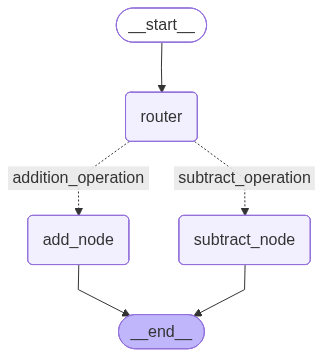

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state = AgentState(number1=10, operation='+', number2=20)
results = app.invoke(initial_state)
print(results)

{'number1': 10, 'operation': '+', 'number2': 20, 'finalNumber': 30}


In [16]:
class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  operation2: str
  number3: int
  number4: int
  finalNumber: int
  finalNumber2: int

def adder(state: AgentState) -> AgentState:
  state['finalNumber'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState) -> AgentState:
  state['finalNumber'] = state['number1'] - state['number2']
  return state

def subtractor2(state: AgentState) -> AgentState:
  state['finalNumber2'] = state['number3'] - state['number4']
  return state

def adder2(state: AgentState) -> AgentState:
  state['finalNumber2'] = state['number3'] + state['number4']
  return state  


def decide_router1(state: AgentState) -> str:
  if state['operation'] == '+':
        return 'addition_operation'
  elif state['operation'] == '-':
      return 'subtract_operation'
  else:
    raise ValueError(f"Invalid operation: {state['operation']}")

def decide_router2(state: AgentState) -> str:
  if state['operation2'] == '+':
    return 'addition_operation2'
  elif state['operation2'] == '-':
    return 'subtract_operation2'
  else:
    raise ValueError(f"Invalid operation: {state['operation2']}")



In [19]:
graph = StateGraph(AgentState)
graph.add_node("router", lambda state: state)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state: state)
graph.add_edge(START, "router")
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)
graph.add_conditional_edges(
  "router",
  decide_router1,
  {
    "addition_operation": "add_node",
    "subtract_operation": "subtract_node",
  }
)
graph.add_conditional_edges(
  "router2",
  decide_router2,
  {
    "addition_operation2": "add_node2",
    "subtract_operation2": "subtract_node2",
  })

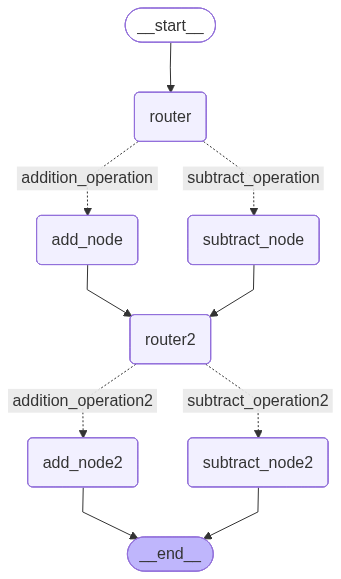

{'number1': 10, 'operation': '+', 'number2': 20, 'operation2': '-', 'number3': 7, 'number4': 3, 'finalNumber': 30, 'finalNumber2': 4}


In [20]:
app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
initial_state = AgentState(number1=10, operation='+', number2=20, number3 = 7, number4 = 3, operation2 = '-', finalNumber = 0, finalNumber2 = 0)
results = app.invoke(initial_state)
print(results)
